In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
import matplotlib
import speech_recognition as sr
import threading
from gtts import gTTS
import os
import platform
import subprocess

# Set Matplotlib to use interactive TkAgg backend
matplotlib.use('TkAgg')

# 3D voxel grid for accurate shapes
grid_size = 50  # Define a 3D space
voxels = np.zeros((grid_size, grid_size, grid_size))

# Initialize figure and axes
fig = plt.figure(figsize=(12, 6))
ax3d = fig.add_subplot(121, projection='3d')
ax2d = fig.add_subplot(122)
ax2d.set_xlim(0, grid_size)
ax2d.set_ylim(0, grid_size)
ax2d.set_title("2D Scribble Area")
ax2d.axis("off")

# Store drawn points
scribble_points = []

# Function to speak messages (for voice commands)
def speak_message(message):
    tts = gTTS(text=message, lang='en')
    tts.save("message.mp3")
    if platform.system() == "Darwin":
        subprocess.run(["afplay", "message.mp3"])
    elif platform.system() == "Linux":
        subprocess.run(["xdg-open", "message.mp3"])
    elif platform.system() == "Windows":
        os.system("start message.mp3")

# Convert voxel data to 3D model using marching cubes
def update_3d():
    ax3d.clear()
    ax3d.set_title("3D Model")
    ax3d.axis("off")

    if np.max(voxels) == 0:
        print("No shape detected.")
        return

    # Apply marching cubes
    vertices, faces, _, _ = marching_cubes(voxels, level=0.5)
    ax3d.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, cmap="viridis", alpha=0.8)
    fig.canvas.draw_idle()

# Draw a sphere at (cx, cy, cz)
def draw_sphere(cx, cy, cz, radius):
    global voxels
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                if (x - cx)**2 + (y - cy)**2 + (z - cz)**2 <= radius**2:
                    voxels[x, y, z] = 1
    update_3d()
    speak_message("Sphere drawn successfully!")

# Draw a cuboid at (cx, cy, cz)
def draw_cuboid(cx, cy, cz, width, height, depth):
    global voxels
    x_start, x_end = max(0, cx - width // 2), min(grid_size, cx + width // 2)
    y_start, y_end = max(0, cy - height // 2), min(grid_size, cy + height // 2)
    z_start, z_end = max(0, cz - depth // 2), min(grid_size, cz + depth // 2)

    voxels[x_start:x_end, y_start:y_end, z_start:z_end] = 1
    update_3d()
    speak_message("Cuboid drawn successfully!")

# Function to handle voice commands
def handle_voice_command(command):
    center = grid_size // 2  # Center of the 3D space

    if "sphere" in command:
        draw_sphere(center, center, center, 10)
    elif "cuboid" in command:
        draw_cuboid(center, center, center, 20, 10, 10)
    elif "clear" in command:
        clear_canvas()
        speak_message("Canvas cleared.")
    else:
        speak_message("Command not recognized.")

# Function to listen for voice commands
def continuous_listening():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        speak_message("Welcom to scribble to 3D model. Draw using your voice. Say 'Stop' to end.")
        while True:
            try:
                audio = recognizer.listen(source, timeout=5)
                command = recognizer.recognize_google(audio).lower()
                if "stop" in command:
                    speak_message("Voice input stopped.")
                    break
                handle_voice_command(command)
            except sr.UnknownValueError:
                print("Could not understand.")
            except sr.RequestError as e:
                print(f"Speech recognition request failed: {e}")

# Start voice command listener in a separate thread
def start_voice_listener():
    listener_thread = threading.Thread(target=continuous_listening, daemon=True)
    listener_thread.start()

# Clear the voxel grid
def clear_canvas():
    global voxels, scribble_points
    voxels.fill(0)
    scribble_points = []
    ax2d.clear()
    ax2d.set_xlim(0, grid_size)
    ax2d.set_ylim(0, grid_size)
    ax2d.set_title("2D Scribble Area")
    ax2d.axis("off")
    update_3d()

# Mouse event to capture scribble
def on_mouse_press(event):
    if event.xdata is not None and event.ydata is not None:
        scribble_points.append((int(event.xdata), int(event.ydata)))
        ax2d.plot(event.xdata, event.ydata, 'ko', markersize=3)
        fig.canvas.draw()

# Convert 2D scribble into a 3D shape
def convert_scribble_to_3d():
    global voxels
    for x, y in scribble_points:
        voxels[x, y, grid_size // 2] = 1
    update_3d()
    speak_message("Scribble converted to 3D model!")

# Connect mouse event
fig.canvas.mpl_connect("button_press_event", on_mouse_press)

# Show the interactive window
start_voice_listener()
update_3d()
plt.show()

No shape detected.


2025-02-04 14:07:48.439 python[60764:4511767] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-04 14:07:48.439 python[60764:4511767] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
import matplotlib
import speech_recognition as sr
import threading
from gtts import gTTS
import os
import platform
import subprocess

# Set Matplotlib to use interactive TkAgg backend
matplotlib.use('TkAgg')

# 3D voxel grid for accurate shapes
grid_size = 50
voxels = np.zeros((grid_size, grid_size, grid_size))

# Aspect ratio options
aspect_ratios = [(16, 9), (4, 3), (1, 1)]
current_ratio_index = 0

# Initialize figure and axes
fig = plt.figure(figsize=(12, 6))
ax3d = fig.add_subplot(121, projection='3d')
ax2d = fig.add_subplot(122)
ax2d.set_xlim(0, grid_size)
ax2d.set_ylim(0, grid_size)
ax2d.set_title("2D Scribble Area")
ax2d.axis("off")

# Function to speak messages
def speak_message(message):
    tts = gTTS(text=message, lang='en')
    tts.save("message.mp3")
    if platform.system() == "Darwin":
        subprocess.run(["afplay", "message.mp3"])
    elif platform.system() == "Linux":
        subprocess.run(["xdg-open", "message.mp3"])
    elif platform.system() == "Windows":
        os.system("start message.mp3")

# Convert voxel data to 3D model using marching cubes
def update_3d():
    ax3d.clear()
    ax3d.set_title("3D Model")
    ax3d.axis("off")

    if np.max(voxels) == 0:
        print("No shape detected.")
        return

    vertices, faces, _, _ = marching_cubes(voxels, level=0.5)
    ax3d.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, cmap="viridis", alpha=0.8)
    fig.canvas.draw_idle()

# Draw a sphere
def draw_sphere(cx, cy, cz, radius):
    global voxels
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                if (x - cx)**2 + (y - cy)**2 + (z - cz)**2 <= radius**2:
                    voxels[x, y, z] = 1
    update_3d()
    speak_message("Sphere drawn successfully!")

# Draw a cuboid
def draw_cuboid(cx, cy, cz, width, height, depth):
    global voxels
    x_start, x_end = max(0, cx - width // 2), min(grid_size, cx + width // 2)
    y_start, y_end = max(0, cy - height // 2), min(grid_size, cy + height // 2)
    z_start, z_end = max(0, cz - depth // 2), min(grid_size, cz + depth // 2)

    voxels[x_start:x_end, y_start:y_end, z_start:z_end] = 1
    update_3d()
    speak_message("Cuboid drawn successfully!")

# Handle voice commands
def handle_voice_command(command):
    center = grid_size // 2

    if "sphere" in command:
        draw_sphere(center, center, center, 10)
    elif "cuboid" in command:
        draw_cuboid(center, center, center, 20, 10, 10)
    elif "clear" in command:
        clear_canvas()
        speak_message("Canvas cleared.")
    else:
        speak_message("Command not recognized.")

# Continuous voice listening
def continuous_listening():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        speak_message("Welcome to scribble to 3D model. Say 'Stop' to end.")
        while True:
            try:
                audio = recognizer.listen(source, timeout=5)
                command = recognizer.recognize_google(audio).lower()
                if "stop" in command:
                    speak_message("Voice input stopped.")
                    break
                handle_voice_command(command)
            except sr.UnknownValueError:
                print("Could not understand.")
            except sr.RequestError as e:
                print(f"Speech recognition request failed: {e}")

# Start voice command listener in a separate thread
def start_voice_listener():
    listener_thread = threading.Thread(target=continuous_listening, daemon=True)
    listener_thread.start()

# Clear the voxel grid
def clear_canvas():
    global voxels, scribble_points
    voxels.fill(0)
    scribble_points = []
    ax2d.clear()
    ax2d.set_xlim(0, grid_size)
    ax2d.set_ylim(0, grid_size)
    ax2d.set_title("2D Scribble Area")
    ax2d.axis("off")
    update_3d()

# Mouse event to capture scribble
scribble_points = []
def on_mouse_press(event):
    if event.xdata is not None and event.ydata is not None:
        scribble_points.append((int(event.xdata), int(event.ydata)))
        ax2d.plot(event.xdata, event.ydata, 'ko', markersize=3)
        fig.canvas.draw()

# Convert 2D scribble into a 3D shape
def convert_scribble_to_3d():
    global voxels
    for x, y in scribble_points:
        voxels[x, y, grid_size // 2] = 1
    update_3d()
    speak_message("Scribble converted to 3D model!")

# Toggle aspect ratio
def toggle_aspect_ratio(event):
    global current_ratio_index
    current_ratio_index = (current_ratio_index + 1) % len(aspect_ratios)
    width, height = aspect_ratios[current_ratio_index]
    fig.set_size_inches(width, height)
    fig.canvas.draw_idle()

# Handle window resizing
def on_resize(event):
    fig.set_size_inches(event.width / fig.dpi, event.height / fig.dpi, forward=True)
    fig.canvas.draw_idle()

# Add button for toggling aspect ratio
button_ax = fig.add_axes([0.8, 0.02, 0.15, 0.05])  # Positioning of button
toggle_button = Button(button_ax, "Toggle Aspect Ratio")
toggle_button.on_clicked(toggle_aspect_ratio)

# Connect mouse event
fig.canvas.mpl_connect("button_press_event", on_mouse_press)
fig.canvas.mpl_connect("resize_event", on_resize)

# Start the UI
start_voice_listener()
update_3d()
plt.show()

No shape detected.


2025-02-19 10:31:35.622 python[11443:352918] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-19 10:31:35.622 python[11443:352918] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.


Exception in thread Thread-5 (continuous_listening):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/73/_3tmqcj93g913rm3l95q9y2h0000gn/T/ipykernel_11443/4061600350.py", line 103, in continuous_listening
  File "/opt/anaconda3/lib/python3.12/site-packages/speech_recognition/recognizers/google.py", line 255, in recognize_legacy
    response_text = obtain_transcription(
                    ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/speech_recognition/recognizers/google.py", line 215, in obtain_transcription
    response = urlopen(request, timeout=timeout)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
import matplotlib
import speech_recognition as sr
import threading
from gtts import gTTS
import os
import platform
import subprocess

# Set Matplotlib to use interactive TkAgg backend
matplotlib.use("TkAgg")

# 3D voxel grid for accurate shapes
grid_size = 50
voxels = np.zeros((grid_size, grid_size, grid_size))

# Initialize figure with a modern style
plt.style.use("dark_background")  # Dark mode UI
fig, (ax3d, ax2d) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [2, 1]})
ax3d = fig.add_subplot(121, projection="3d", facecolor="black")
ax2d.set_xlim(0, grid_size)
ax2d.set_ylim(0, grid_size)
ax2d.set_title("2D Scribble Area", fontsize=12, fontweight="bold", color="white")
ax2d.axis("off")

# Function to speak messages
def speak_message(message):
    tts = gTTS(text=message, lang="en")
    tts.save("message.mp3")
    if platform.system() == "Darwin":
        subprocess.run(["afplay", "message.mp3"])
    elif platform.system() == "Linux":
        subprocess.run(["xdg-open", "message.mp3"])
    elif platform.system() == "Windows":
        os.system("start message.mp3")

# Convert voxel data to 3D model using marching cubes
def update_3d():
    ax3d.clear()
    ax3d.set_title("3D Model", fontsize=14, fontweight="bold", color="white")
    ax3d.axis("off")
    ax3d.set_facecolor("black")

    if np.max(voxels) == 0:
        print("No shape detected.")
        return

    vertices, faces, _, _ = marching_cubes(voxels, level=0.5)
    ax3d.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, cmap="plasma", alpha=0.85)
    fig.canvas.draw_idle()

# Draw a sphere
def draw_sphere():
    global voxels
    cx, cy, cz, radius = grid_size // 2, grid_size // 2, grid_size // 2, 10
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                if (x - cx) ** 2 + (y - cy) ** 2 + (z - cz) ** 2 <= radius ** 2:
                    voxels[x, y, z] = 1
    update_3d()
    speak_message("Sphere drawn successfully!")

# Draw a cuboid
def draw_cuboid():
    global voxels
    cx, cy, cz, width, height, depth = grid_size // 2, grid_size // 2, grid_size // 2, 20, 10, 10
    x_start, x_end = max(0, cx - width // 2), min(grid_size, cx + width // 2)
    y_start, y_end = max(0, cy - height // 2), min(grid_size, cy + height // 2)
    z_start, z_end = max(0, cz - depth // 2), min(grid_size, cz + depth // 2)

    voxels[x_start:x_end, y_start:y_end, z_start:z_end] = 1
    update_3d()
    speak_message("Cuboid drawn successfully!")

# Handle voice commands
def handle_voice_command(command):
    if "sphere" in command:
        draw_sphere()
    elif "cuboid" in command:
        draw_cuboid()
    elif "clear" in command:
        clear_canvas()
        speak_message("Canvas cleared.")
    else:
        speak_message("Command not recognized.")

# Continuous voice listening
def continuous_listening():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        speak_message("Say 'Stop' to end voice input.")
        while True:
            try:
                audio = recognizer.listen(source, timeout=5)
                command = recognizer.recognize_google(audio).lower()
                if "stop" in command:
                    speak_message("Voice input stopped.")
                    break
                handle_voice_command(command)
            except sr.UnknownValueError:
                print("Could not understand.")
            except sr.RequestError as e:
                print(f"Speech recognition request failed: {e}")

# Start voice command listener in a separate thread
def start_voice_listener():
    listener_thread = threading.Thread(target=continuous_listening, daemon=True)
    listener_thread.start()

# Clear the voxel grid
def clear_canvas():
    global voxels, scribble_points
    voxels.fill(0)
    scribble_points = []
    ax2d.clear()
    ax2d.set_xlim(0, grid_size)
    ax2d.set_ylim(0, grid_size)
    ax2d.set_title("2D Scribble Area", fontsize=12, fontweight="bold", color="white")
    ax2d.axis("off")
    update_3d()

# Mouse event to capture scribble
scribble_points = []
def on_mouse_press(event):
    if event.xdata is not None and event.ydata is not None:
        scribble_points.append((int(event.xdata), int(event.ydata)))
        ax2d.plot(event.xdata, event.ydata, 'ro', markersize=3)
        fig.canvas.draw()

# Convert 2D scribble into a 3D shape
def convert_scribble_to_3d():
    global voxels
    for x, y in scribble_points:
        voxels[x, y, grid_size // 2] = 1
    update_3d()
    speak_message("Scribble converted to 3D model!")

# Add Buttons for Better UI
button_color = "#FF5733"  # Vibrant color

button_ax1 = fig.add_axes([0.75, 0.02, 0.1, 0.05])  # Button position
button_ax2 = fig.add_axes([0.85, 0.02, 0.1, 0.05])  # Button position
button_ax3 = fig.add_axes([0.75, 0.10, 0.1, 0.05])  # Button position
button_ax4 = fig.add_axes([0.85, 0.10, 0.1, 0.05])  # Button position

sphere_button = Button(button_ax1, "Sphere", color=button_color, hovercolor="lightgray")
cuboid_button = Button(button_ax2, "Cuboid", color=button_color, hovercolor="lightgray")
clear_button = Button(button_ax3, "Clear", color=button_color, hovercolor="lightgray")
scribble_button = Button(button_ax4, "Scribble → 3D", color=button_color, hovercolor="lightgray")

sphere_button.on_clicked(lambda event: draw_sphere())
cuboid_button.on_clicked(lambda event: draw_cuboid())
clear_button.on_clicked(lambda event: clear_canvas())
scribble_button.on_clicked(lambda event: convert_scribble_to_3d())

# Connect mouse event
fig.canvas.mpl_connect("button_press_event", on_mouse_press)

# Start the UI
start_voice_listener()
update_3d()
plt.show()

No shape detected.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.
Could not understand.


Exception in thread Thread-6 (continuous_listening):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/73/_3tmqcj93g913rm3l95q9y2h0000gn/T/ipykernel_11443/1287790731.py", line 99, in continuous_listening
  File "/opt/anaconda3/lib/python3.12/site-packages/speech_recognition/__init__.py", line 460, in listen
    for a in result:
  File "/opt/anaconda3/lib/python3.12/site-packages/speech_recognition/__init__.py", line 490, in _listen
    raise WaitTimeoutError("listening timed out while waiting for phrase to start")
speech_recognition.exceptions.WaitTimeoutError: listening timed out while waiting for phrase to start


No shape detected.


In [23]:
import matplotlib.pyplot as plt
print(plt.style.available)

!pip install seaborn

plt.style.use("seaborn-white")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


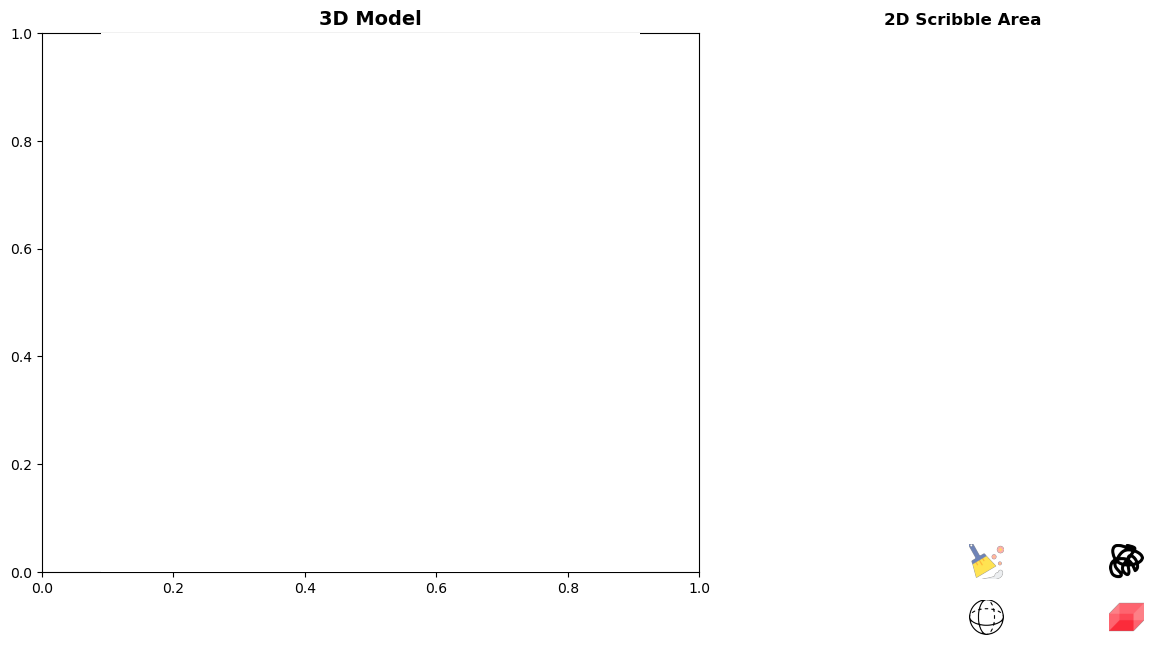

Could not understand.
Could not understand.
Could not understand.
Could not understand.


In [2]:
import matplotlib.pyplot as plt
print(plt.style.available)

!pip install seaborn

#plt.style.use("seaborn-white")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
import matplotlib.animation as animation
import speech_recognition as sr
import threading
from gtts import gTTS
import os
import platform
import subprocess
import matplotlib.image as mpimg

# Set Light Theme
#plt.style.use("seaborn-whitegrid")

# Initialize Figure
fig, (ax3d, ax2d) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [2, 1]})
ax3d = fig.add_subplot(121, projection="3d", facecolor="white")
ax2d.set_xlim(0, 50)
ax2d.set_ylim(0, 50)
ax2d.set_title("2D Scribble Area", fontsize=12, fontweight="bold", color="black")
ax2d.axis("off")

# 3D Voxel Grid
grid_size = 50
voxels = np.zeros((grid_size, grid_size, grid_size))

# 🎙️ Function to Speak Messages
def speak_message(message):
    tts = gTTS(text=message, lang="en")
    tts.save("message.mp3")
    if platform.system() == "Darwin":
        subprocess.run(["afplay", "message.mp3"])
    elif platform.system() == "Linux":
        subprocess.run(["xdg-open", "message.mp3"])
    elif platform.system() == "Windows":
        os.system("start message.mp3")

# 🎬 Animation for Smooth Rendering
def animate_3d(i):
    ax3d.view_init(elev=20, azim=i)  # Smooth rotation
    fig.canvas.draw_idle()

# Convert Voxel Data to 3D Model
def update_3d():
    ax3d.clear()
    ax3d.set_title("3D Model", fontsize=14, fontweight="bold", color="black")
    ax3d.axis("off")
    ax3d.set_facecolor("white")

    if np.max(voxels) == 0:
        return

    vertices, faces, _, _ = marching_cubes(voxels, level=0.5)
    ax3d.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, cmap="coolwarm", alpha=0.85)
    fig.canvas.draw_idle()

# 🏀 Draw Sphere with Smooth Animation
def draw_sphere():
    global voxels
    cx, cy, cz, radius = grid_size // 2, grid_size // 2, grid_size // 2, 10
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                if (x - cx) ** 2 + (y - cy) ** 2 + (z - cz) ** 2 <= radius ** 2:
                    voxels[x, y, z] = 1
    update_3d()
    ani = animation.FuncAnimation(fig, animate_3d, frames=360, interval=20)
    speak_message("Sphere drawn successfully!")

# 📦 Draw Cuboid with Smooth Animation
def draw_cuboid():
    global voxels
    cx, cy, cz, width, height, depth = grid_size // 2, grid_size // 2, grid_size // 2, 20, 10, 10
    x_start, x_end = max(0, cx - width // 2), min(grid_size, cx + width // 2)
    y_start, y_end = max(0, cy - height // 2), min(grid_size, cy + height // 2)
    z_start, z_end = max(0, cz - depth // 2), min(grid_size, cz + depth // 2)

    voxels[x_start:x_end, y_start:y_end, z_start:z_end] = 1
    update_3d()
    ani = animation.FuncAnimation(fig, animate_3d, frames=360, interval=20)
    speak_message("Cuboid drawn successfully!")

# 🎤 Voice Command Handling
def handle_voice_command(command):
    if "sphere" in command:
        draw_sphere()
    elif "cuboid" in command:
        draw_cuboid()
    elif "clear" in command:
        clear_canvas()
        speak_message("Canvas cleared.")
    else:
        speak_message("Command not recognized.")

# 🎙️ Continuous Voice Listening
def continuous_listening():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        speak_message("Say 'Stop' to end voice input.")
        while True:
            try:
                audio = recognizer.listen(source, timeout=5)
                command = recognizer.recognize_google(audio).lower()
                if "stop" in command:
                    speak_message("Voice input stopped.")
                    break
                handle_voice_command(command)
            except sr.UnknownValueError:
                print("Could not understand.")
            except sr.RequestError as e:
                print(f"Speech recognition request failed: {e}")

# 🚀 Start Voice Listener in Background
def start_voice_listener():
    listener_thread = threading.Thread(target=continuous_listening, daemon=True)
    listener_thread.start()

# 🧹 Clear Canvas
def clear_canvas():
    global voxels, scribble_points
    voxels.fill(0)
    scribble_points = []
    ax2d.clear()
    ax2d.set_xlim(0, grid_size)
    ax2d.set_ylim(0, grid_size)
    ax2d.set_title("2D Scribble Area", fontsize=12, fontweight="bold", color="black")
    ax2d.axis("off")
    update_3d()

# ✏️ Scribble Capture
scribble_points = []
def on_mouse_press(event):
    if event.xdata is not None and event.ydata is not None:
        scribble_points.append((int(event.xdata), int(event.ydata)))
        ax2d.plot(event.xdata, event.ydata, 'bo', markersize=3)  # Blue points for visibility
        fig.canvas.draw()

# 🖌 Convert Scribble to 3D
def convert_scribble_to_3d():
    global voxels
    for x, y in scribble_points:
        voxels[x, y, grid_size // 2] = 1
    update_3d()
    speak_message("Scribble converted to 3D model!")

# 🛠️ Add Buttons with Icons
def add_icon_button(ax, icon_path, callback):
    img = mpimg.imread(icon_path)
    ax.imshow(img)
    ax.axis("off")
    button = Button(ax, "", color="white", hovercolor="lightgray")
    button.on_clicked(callback)
    return button

# 🎨 Buttons with Icons
button_ax1 = fig.add_axes([0.75, 0.02, 0.1, 0.05])
button_ax2 = fig.add_axes([0.85, 0.02, 0.1, 0.05])
button_ax3 = fig.add_axes([0.75, 0.10, 0.1, 0.05])
button_ax4 = fig.add_axes([0.85, 0.10, 0.1, 0.05])

sphere_button = add_icon_button(button_ax1, "icons/sphere.png", draw_sphere)
cuboid_button = add_icon_button(button_ax2, "icons/cuboid.png", draw_cuboid)
clear_button = add_icon_button(button_ax3, "icons/clear.png", clear_canvas)
scribble_button = add_icon_button(button_ax4, "icons/scribble.png", convert_scribble_to_3d)

# 🎨 Connect Mouse Event
fig.canvas.mpl_connect("button_press_event", on_mouse_press)

# 🚀 Start App
start_voice_listener()
update_3d()
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
import matplotlib
import speech_recognition as sr
import threading
from gtts import gTTS
import os
import platform
import subprocess

# Set Matplotlib to use interactive TkAgg backend
matplotlib.use("TkAgg")

# 3D voxel grid for accurate shapes
grid_size = 50
voxels = np.zeros((grid_size, grid_size, grid_size))

# Initialize figure with a modern style
#plt.style.use("seaborn-white")  # Dark mode UI
fig, (ax3d, ax2d) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [2, 1]})
ax3d = fig.add_subplot(121, projection="3d", facecolor="black")
ax2d.set_xlim(0, grid_size)
ax2d.set_ylim(0, grid_size)
ax2d.set_title("2D Scribble Area", fontsize=12, fontweight="bold", color="white")
ax2d.axis("off")

# Function to speak messages
def speak_message(message):
    tts = gTTS(text=message, lang="en")
    tts.save("message.mp3")
    if platform.system() == "Darwin":
        subprocess.run(["afplay", "message.mp3"])
    elif platform.system() == "Linux":
        subprocess.run(["xdg-open", "message.mp3"])
    elif platform.system() == "Windows":
        os.system("start message.mp3")

# Convert voxel data to 3D model using marching cubes
def update_3d():
    ax3d.clear()
    ax3d.set_title("3D Model", fontsize=14, fontweight="bold", color="white")
    ax3d.axis("off")
    ax3d.set_facecolor("black")

    if np.max(voxels) == 0:
        print("No shape detected.")
        return

    vertices, faces, _, _ = marching_cubes(voxels, level=0.5)
    ax3d.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, cmap="plasma", alpha=0.85)
    fig.canvas.draw_idle()

# Draw a sphere
def draw_sphere():
    global voxels
    cx, cy, cz, radius = grid_size // 2, grid_size // 2, grid_size // 2, 10
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                if (x - cx) ** 2 + (y - cy) ** 2 + (z - cz) ** 2 <= radius ** 2:
                    voxels[x, y, z] = 1
    update_3d()
    speak_message("Sphere drawn successfully!")

# Draw a cuboid
def draw_cuboid():
    global voxels
    cx, cy, cz, width, height, depth = grid_size // 2, grid_size // 2, grid_size // 2, 20, 10, 10
    x_start, x_end = max(0, cx - width // 2), min(grid_size, cx + width // 2)
    y_start, y_end = max(0, cy - height // 2), min(grid_size, cy + height // 2)
    z_start, z_end = max(0, cz - depth // 2), min(grid_size, cz + depth // 2)

    voxels[x_start:x_end, y_start:y_end, z_start:z_end] = 1
    update_3d()
    speak_message("Cuboid drawn successfully!")

# Handle voice commands
def handle_voice_command(command):
    if "sphere" in command:
        draw_sphere()
    elif "cuboid" in command:
        draw_cuboid()
    elif "clear" in command:
        clear_canvas()
        speak_message("Canvas cleared.")
    else:
        speak_message("Command not recognized.")

# Continuous voice listening
def continuous_listening():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        speak_message("Say 'Stop' to end voice input.")
        while True:
            try:
                audio = recognizer.listen(source, timeout=5)
                command = recognizer.recognize_google(audio).lower()
                if "stop" in command:
                    speak_message("Voice input stopped.")
                    break
                handle_voice_command(command)
                if "go" in command:
                    speak_message("Voice imput restored.")
                    break
                handle_voice_command(command)
            except sr.UnknownValueError:
                print("Could not understand.")
            except sr.RequestError as e:
                print(f"Speech recognition request failed: {e}")

# Start voice command listener in a separate thread
def start_voice_listener():
    listener_thread = threading.Thread(target=continuous_listening, daemon=True)
    listener_thread.start()

# Clear the voxel grid
def clear_canvas():
    global voxels, scribble_points
    voxels.fill(0)
    scribble_points = []
    ax2d.clear()
    ax2d.set_xlim(0, grid_size)
    ax2d.set_ylim(0, grid_size)
    ax2d.set_title("2D Scribble Area", fontsize=12, fontweight="bold", color="white")
    ax2d.axis("off")
    update_3d()

# Mouse event to capture scribble
scribble_points = []
def on_mouse_press(event):
    if event.xdata is not None and event.ydata is not None:
        scribble_points.append((int(event.xdata), int(event.ydata)))
        ax2d.plot(event.xdata, event.ydata, 'ro', markersize=3)
        fig.canvas.draw()

# Convert 2D scribble into a 3D shape
def convert_scribble_to_3d():
    global voxels
    for x, y in scribble_points:
        voxels[x, y, grid_size // 2] = 1
    update_3d()
    speak_message("Scribble converted to 3D model!")

# Add Buttons for Better UI
button_color = "#FF5733"  # Vibrant color

button_ax1 = fig.add_axes([0.75, 0.02, 0.1, 0.05])  # Button position
button_ax2 = fig.add_axes([0.85, 0.02, 0.1, 0.05])  # Button position
button_ax3 = fig.add_axes([0.75, 0.10, 0.1, 0.05])  # Button position
button_ax4 = fig.add_axes([0.85, 0.10, 0.1, 0.05])  # Button position

sphere_button = Button(button_ax1, "Sphere", color=button_color, hovercolor="lightgray")
cuboid_button = Button(button_ax2, "Cuboid", color=button_color, hovercolor="lightgray")
clear_button = Button(button_ax3, "Clear", color=button_color, hovercolor="lightgray")
scribble_button = Button(button_ax4, "Scribble → 3D", color=button_color, hovercolor="lightgray")

sphere_button.on_clicked(lambda event: draw_sphere())
cuboid_button.on_clicked(lambda event: draw_cuboid())
clear_button.on_clicked(lambda event: clear_canvas())
scribble_button.on_clicked(lambda event: convert_scribble_to_3d())

# Connect mouse event
fig.canvas.mpl_connect("button_press_event", on_mouse_press)

# Start the UI
start_voice_listener()
update_3d()
plt.show()

No shape detected.
No shape detected.
Could not understand.
No shape detected.
No shape detected.
No shape detected.


Error: AudioFileOpen failed ('wht?')


Could not understand.
Could not understand.


Exception in thread Thread-6 (continuous_listening):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/73/_3tmqcj93g913rm3l95q9y2h0000gn/T/ipykernel_69470/2383599494.py", line 99, in continuous_listening
  File "/opt/anaconda3/lib/python3.12/site-packages/speech_recognition/__init__.py", line 460, in listen
    for a in result:
  File "/opt/anaconda3/lib/python3.12/site-packages/speech_recognition/__init__.py", line 490, in _listen
    raise WaitTimeoutError("listening timed out while waiting for phrase to start")
speech_recognition.exceptions.WaitTimeoutError: listening timed out while waiting for phrase to start
